In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


In [2]:
url1 = "data/df_final_demo_cleanead.csv"
url2 = "data/datadf_experiment_non_nan.csv"
url3 = "data/df_web_data_total.csv"

url4 = "data/df_final_clients_data.csv"


df_final_demo_drop_nulls = pd.read_csv(url1)
df_final_experiment_cleaned = pd.read_csv(url2)
df_web_data_total = pd.read_csv(url3)

df_final = pd.read_csv(url4)

In [74]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443784 entries, 0 to 443783
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   client_id             443784 non-null  int64         
 1   seniority_per_years   443784 non-null  float64       
 2   seniority_per_months  443784 non-null  float64       
 3   age                   443784 non-null  float64       
 4   gender                443784 non-null  object        
 5   number_of_accounts    443784 non-null  float64       
 6   balance               443784 non-null  float64       
 7   calls_6_month         443784 non-null  float64       
 8   logons_6_month        443784 non-null  float64       
 9   visitor_id            443784 non-null  object        
 10  visit_id              443784 non-null  object        
 11  process_step          443784 non-null  object        
 12  date_time             443784 non-null  datetime64[ns]
 13 

In [75]:
gender_distribution = df_final['gender'].value_counts()
gender_distribution

gender
U    149867
M    149867
F    144036
X        14
Name: count, dtype: int64

**Categorical variables**:
- Frequency tables. Counts and proportions.
- Visualizations: Bar charts, pie charts

Text(0.5, 1.0, 'Gender Distribution of Clients')

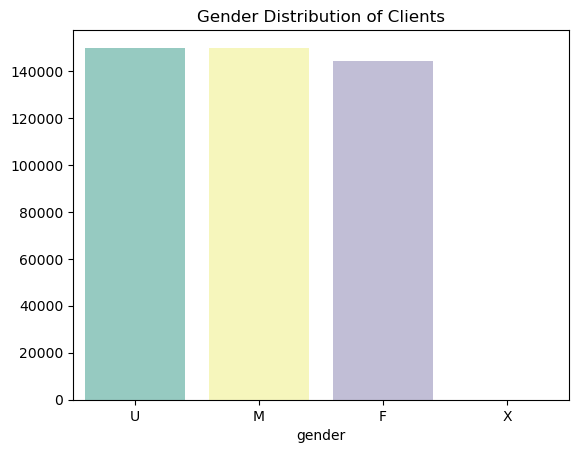

In [76]:
sns.barplot(x = gender_distribution.index, y = gender_distribution.values, hue = gender_distribution.index, palette = "Set3") 
plt.title("Gender Distribution of Clients")

<Axes: ylabel='count'>

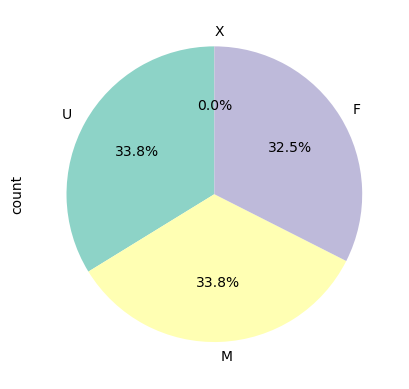

In [77]:
df_final["gender"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

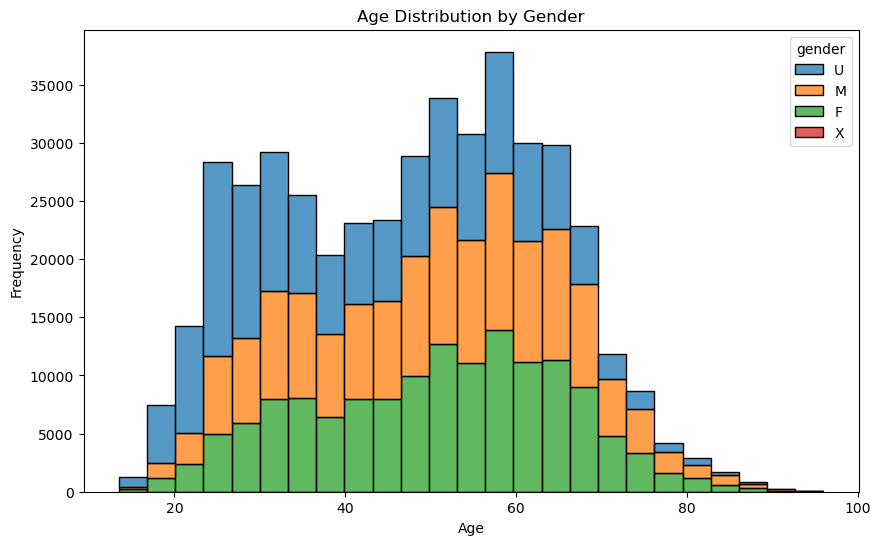

In [78]:
# Gráfico de distribución de edades por género
plt.figure(figsize=(10, 6))
sns.histplot(data = df_final, x = 'age', hue = 'gender', multiple = 'stack', bins = 25)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [79]:
df_final.describe()

,client_id,seniority_per_years,seniority_per_months,age,number_of_accounts,balance,calls_6_month,logons_6_month,date_time,hour
count,4.437840e+05,443784.000000,443784.000000,443784.000000,443784.000000,4.437840e+05,443784.000000,443784.000000,443784,443784.000000
mean,5.004515e+06,12.230889,152.776299,47.639333,2.264113,1.587709e+05,3.523088,5.704879,2017-04-19 23:11:52.558678784,13.832511
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000,2017-03-15 00:03:03,0.000000
25%,2.517726e+06,6.000000,82.000000,33.500000,2.000000,3.845694e+04,2.000000,4.000000,2017-04-04 13:32:53.500000,11.000000
50%,5.025928e+06,11.000000,139.000000,49.000000,2.000000,6.673238e+04,3.000000,6.000000,2017-04-12 13:14:58.500000,13.000000
75%,7.473321e+06,16.000000,194.000000,60.000000,2.000000,1.487760e+05,6.000000,8.000000,2017-04-28 09:54:06,17.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000,2017-06-20 23:57:06,23.000000
std,2.874013e+06,7.002258,83.686207,15.732181,0.542551,3.359062e+05,2.242461,2.356096,NaN,4.854518


In [81]:
mean_age = df_final["age"].mean()  
median_age = df_final["age"].median() 
mode_age = df_final["age"].mode()[0]  

mean_age, median_age, mode_age

(47.63933311449175, 49.0, 58.5)

<Axes: xlabel='age', ylabel='Count'>

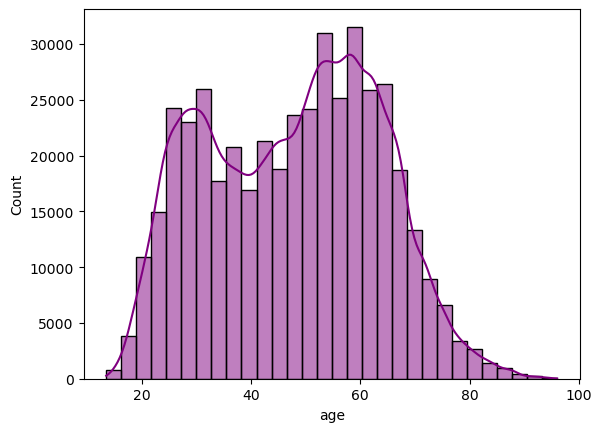

In [82]:
sns.histplot(df_final['age'], kde=True, bins = 30, color= "purple")

<Axes: ylabel='balance'>

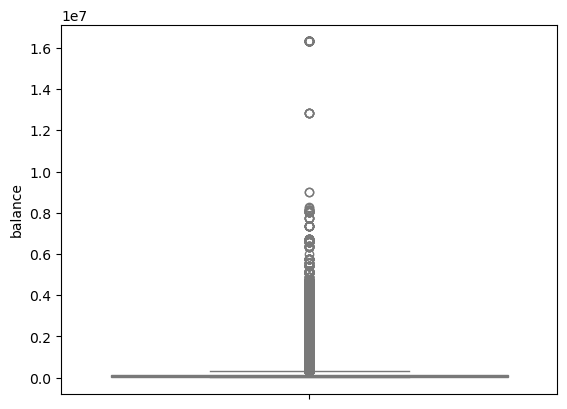

In [83]:
sns.boxplot(data = df_final["balance"], color = "lightblue")

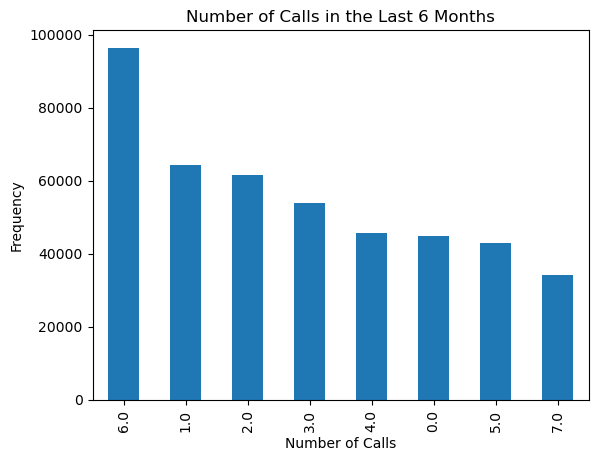

In [84]:
#
df_final['calls_6_month'].value_counts().plot(kind='bar')
plt.title("Number of Calls in the Last 6 Months")
plt.xlabel("Number of Calls")
plt.ylabel('Frequency')
plt.show()


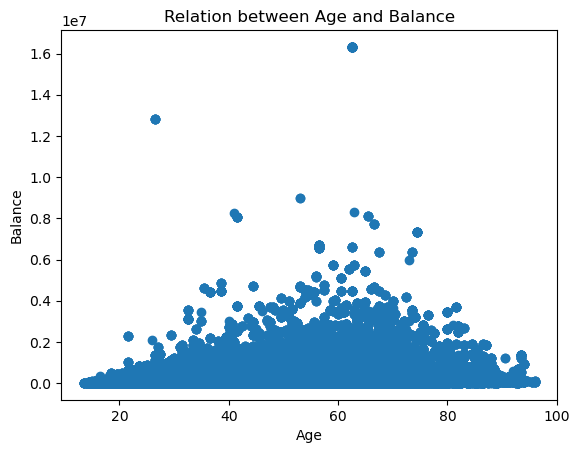

In [85]:
#Relación entre la edad y el balance
plt.scatter(df_final["age"], df_final["balance"])
plt.title("Relation between Age and Balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()


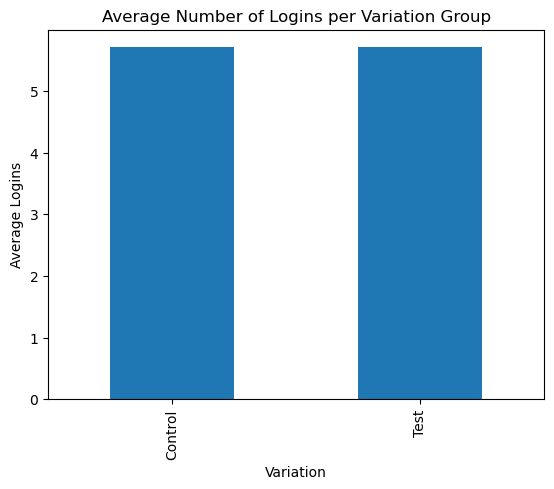

In [86]:
df_final.groupby('Variation')['logons_6_month'].mean().plot(kind='bar')
plt.title("Average Number of Logins per Variation Group")
plt.ylabel("Average Logins")
plt.show()


In [88]:
#cuántos pasos ha completado cada cliente
main_clients = df_final.groupby('client_id')['process_step'].count().sort_values(ascending=False)

#muestra los 10 clientes principales
top_client = main_clients.head(10)
print(top_client)


client_id
2128341    81
9800867    75
465007     72
9638063    71
3539274    69
2313292    61
4167815    61
5165430    60
2261960    59
7597144    58
Name: process_step, dtype: int64


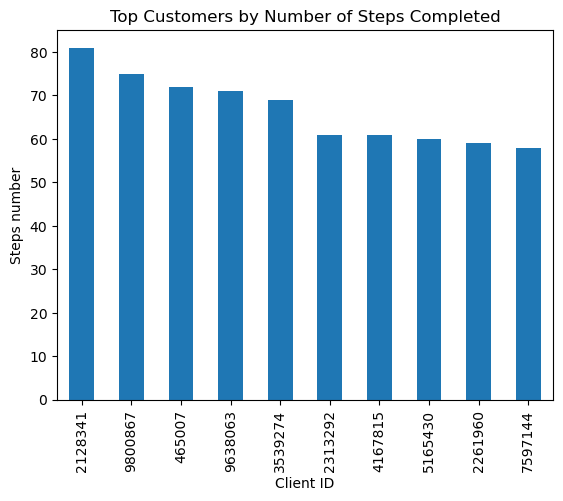

In [89]:
top_client.plot(kind='bar')
plt.title("Top Customers by Number of Steps Completed")
plt.xlabel('Client ID')
plt.ylabel('Steps number')
plt.show()


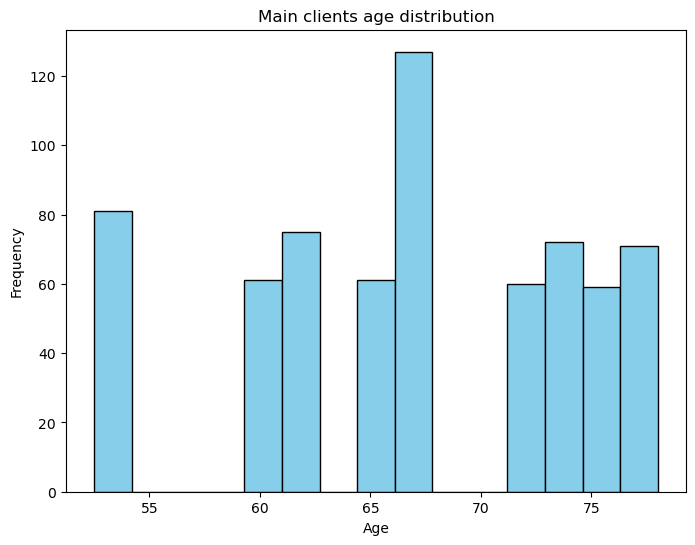

The average age of the main customers is: 66.88230884557721


In [90]:
# Filtrar el DataFrame de clientes demográficos para obtener los principales clientes
clientes_edad = df_final[df_final['client_id'].isin(top_client.index)]

# Visualizar la distribución de edades de los principales clientes
# Ajustar el número de bins para mejorar la visualización
plt.figure(figsize = (8,6))
clientes_edad['age'].hist(bins = 15, color = 'skyblue', edgecolor = 'black')
plt.title("Main clients age distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)  # Eliminar la cuadrícula para mejor estética
plt.show()


# Calcular la edad promedio de los principales clientes
edad_promedio = clientes_edad['age'].mean()
print(f'The average age of the main customers is: {edad_promedio}')


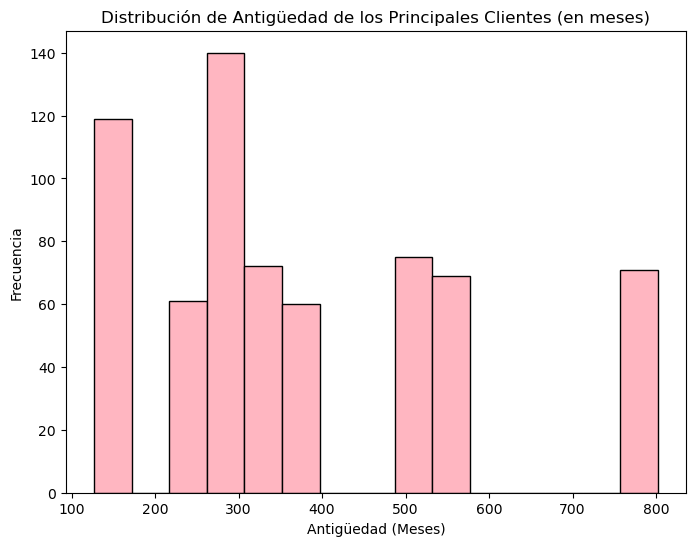

La antigüedad promedio de los principales clientes es: 384.10044977511245 meses


In [92]:
# Crear una columna que combine años y meses de permanencia
df_final["seniority_per_months"] = df_final["seniority_per_years"] * 12 + df_final["seniority_per_months"]

# Filtrar la permanencia de los principales clientes
clientes_permanencia = df_final[df_final['client_id'].isin(top_client.index)]["seniority_per_months"]

# Visualizar la permanencia de los principales clientes
plt.figure(figsize=(8,6))
clientes_permanencia.hist(bins=15, color = "lightpink", edgecolor='black')
plt.title('Distribución de Antigüedad de los Principales Clientes (en meses)')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Frecuencia')
plt.grid(False)  # Eliminar la cuadrícula para una mejor visualización
plt.show()

# Calcular la antigüedad promedio de los principales clientes
antiguedad_promedio = clientes_permanencia.mean()
print(f'La antigüedad promedio de los principales clientes es: {antiguedad_promedio} meses')


In [95]:
df_final['total_interactions'] = df_final['calls_6_month'] + df_final['logons_6_month']
# Identificar a los principales clientes (top 10)
top_clients = df_final[['client_id', 'total_interactions', 'age', 'gender']].sort_values(by='total_interactions', ascending=False).head(10)
# Mostrar los principales clientes
top_clients

,client_id,total_interactions,age,gender
0,836976,15.0,60.5,U
78835,7680107,15.0,55.0,U
78833,7680107,15.0,55.0,U
78832,7680107,15.0,55.0,U
78831,7680107,15.0,55.0,U
78830,7680107,15.0,55.0,U
78829,7680107,15.0,55.0,U
78828,7680107,15.0,55.0,U
78827,7680107,15.0,55.0,U
78826,7680107,15.0,55.0,U


Tasa de Conversión por Proceso:

Calcula la tasa de conversión en cada process_step para ambos grupos (Test y Control).

In [6]:
#NUEVA TABLA 

new_step_counts = df_final.groupby(['process_step', 'Variation']).size().reset_index(name='counts')

new_conversion_rate = df_final.groupby(['process_step', 'Variation'])['visit_id'].nunique() / df_final['visitor_id'].nunique()

In [7]:
new_step_counts

,process_step,Variation,counts
0,confirm,Control,22571
1,confirm,Test,37535
2,start,Control,66387
3,start,Test,74992
4,step_1,Control,42789
5,step_1,Test,52691
6,step_2,Control,38350
7,step_2,Test,40896
8,step_3,Control,34135
9,step_3,Test,33438


In [8]:
new_conversion_rate

process_step  Variation
confirm       Control      0.264593
              Test         0.411941
start         Control      0.564188
              Test         0.581676
step_1        Control      0.429070
              Test         0.497256
step_2        Control      0.385076
              Test         0.413041
step_3        Control      0.358915
              Test         0.365554
Name: visit_id, dtype: float64

Promedio de Tiempo en Cada Proceso:

Calcula el tiempo promedio que los usuarios pasan en cada process_step.

In [7]:
# Definir el orden de los process_step
process_step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
sorted_df_final = df_final.sort_values(by=['visit_id', 'date_time'])

# Convertir la columna process_step en una categoría con el orden especificado
sorted_df_final['process_step'] = pd.Categorical(sorted_df_final['process_step'], categories=process_step_order, ordered=True)

# Ordenar los datos por visit_id y date_time para calcular el tiempo transcurrido
sorted_merged_data = sorted_df_final.sort_values(by=['visit_id', 'date_time'])

# Calcular el tiempo en cada process_step
sorted_df_final['time_spent'] = sorted_df_final.groupby('visit_id')['date_time'].diff().dt.total_seconds().fillna(0)

# Convertir el tiempo de segundos a minutos
sorted_df_final['time_spent_minutes'] = sorted_df_final['time_spent'] / 60

# Calcular el tiempo promedio por visit_id, process_step y Variation (Test o Control)
average_time_per_step = sorted_df_final.groupby(['process_step', 'Variation'], observed=False)['time_spent_minutes'].mean().reset_index()

# Renombrar la columna para mayor claridad
average_time_per_step.rename(columns={'time_spent_minutes': 'average_time_spent_minutes'}, inplace=True)

# Ordenar el DataFrame por process_step y average_time_spent_minutes
df_final_average_time_per_step = average_time_per_step.sort_values(by=['process_step', 'average_time_spent_minutes'], ascending=False)

# Mostrar los resultados
df_final_average_time_per_step


,process_step,Variation,average_time_spent_minutes
8,confirm,Control,2.042240
9,confirm,Test,1.886313
7,step_3,Test,1.607323
6,step_3,Control,1.568846
5,step_2,Test,0.769109
4,step_2,Control,0.669962
2,step_1,Control,0.701237
3,step_1,Test,0.643193
1,start,Test,1.046901
0,start,Control,0.967919


Distribución de Visitas por Día:


In [98]:
visits_per_day_by_variation = df_final.groupby(['date', 'Variation', 'client_id'])['visit_id'].count().reset_index()

# Luego contar el número total de visitas por día y variación
visits_per_day_summary = visits_per_day_by_variation.groupby(['date', 'Variation'])['visit_id'].count().reset_index()

visits_per_day_summary.rename(columns={'visit_id': 'visits_per_day'}, inplace=True)
visits_per_day_summary


,date,Variation,visits_per_day
0,2017-03-15,Control,171
1,2017-03-15,Test,198
2,2017-03-16,Control,70
3,2017-03-16,Test,79
4,2017-03-17,Control,37
...,...,...,...
191,2017-06-18,Test,194
192,2017-06-19,Control,254
193,2017-06-19,Test,228
194,2017-06-20,Control,305


Distribución de Visitas por Hora


In [63]:
df_final['date_time'] = pd.to_datetime(df_final['date_time'])

df_final['hour'] = df_final['date_time'].dt.hour

visits_per_hour_by_variation = df_final.groupby(['hour', 'Variation']).size().reset_index(name='visitas')

visits_per_hour_pivot = visits_per_hour_by_variation.pivot(index='hour', columns='Variation', values='visitas').fillna(0)

visits_per_hour_pivot.columns.name = None
visits_per_hour_pivot = visits_per_hour_pivot.reset_index(drop=False)

visits_per_hour_pivot

,hour,Control,Test
0,0,3244,3701
1,1,1984,2270
2,2,1078,1137
3,3,710,812
4,4,377,480
5,5,831,918
6,6,1869,2093
7,7,3966,4647
8,8,7216,7984
9,9,9947,11485


Tasa de Conversión por Proceso

Descripción: Mide el porcentaje de usuarios que completan cada process_step

In [58]:
# Calcular el número de usuarios que completan cada process_step agrupado por Variation (Test o Control)
users_completed_by_variation = df_final.groupby(['process_step', 'Variation'])['client_id'].nunique().reset_index(name='users_completed')

# Calcular el total de usuarios por Variation
total_users_by_variation = df_final.groupby('Variation')['client_id'].nunique().reset_index(name='total_users')

# Unir ambos DataFrames para calcular la tasa de conversión
conversion_rate_by_step = pd.merge(users_completed_by_variation, total_users_by_variation, on='Variation')

# Calcular la tasa de conversión por process_step y Variation
conversion_rate_by_step['conversion_rate'] = (conversion_rate_by_step['users_completed'] / conversion_rate_by_step['total_users']) * 100

# Seleccionar las columnas importantes para mostrar el resultado
conversion_rate_by_step[['process_step', 'Variation', 'conversion_rate']]


,process_step,Variation,conversion_rate
0,confirm,Control,54.936546
1,confirm,Test,70.703390
2,start,Control,93.903394
3,start,Test,91.490966
4,step_1,Control,80.278974
5,step_1,Test,83.984620
6,step_2,Control,77.726841
7,step_2,Test,73.879828
8,step_3,Control,74.665959
9,step_3,Test,67.574699


Análisis de Puntos de Abandono

Descripción: Analiza en qué punto los usuarios tienden a abandonar el proceso, lo que puede indicar problemas en la experiencia del usuario.

In [99]:
# Define the new order of the process steps
order_of_steps = ['confirm', 'start', 'step_1', 'step_2', 'step_3']

# Initialize the DataFrame for the results
total_abandonment_analysis = pd.DataFrame()

# Iterate over each group (Test and Control)
for group in ['Test', 'Control']:
    # Filter by group
    group_data = df_final[df_final['Variation'] == group]

    # Create a DataFrame to count users by step for each group
    total_users_per_step = group_data.groupby('process_step')['client_id'].nunique().reindex(order_of_steps).reset_index(name='total_users')

    # Initialize the abandonment dictionary
    abandonments = {}

    # Calculate abandonments for each step
    for i in range(len(order_of_steps) - 1):  # Iterate until the penultimate step
        current_step = order_of_steps[i]
        next_step = order_of_steps[i + 1]

        # Number of users in the current step
        users_in_current_step = total_users_per_step.loc[total_users_per_step['process_step'] == current_step, 'total_users'].values[0]
        # Number of users in the next step
        users_in_next_step = total_users_per_step.loc[total_users_per_step['process_step'] == next_step, 'total_users'].values[0]

        # Calculate abandonments as the non-negative difference
        abandonments[current_step] = max(users_in_current_step - users_in_next_step, 0)

    # Convert the abandonment dictionary to DataFrame
    abandonment_analysis = pd.DataFrame(abandonments.items(), columns=['process_step', 'abandonments'])

    # Merge with the total users per step
    abandonment_analysis = pd.merge(abandonment_analysis, total_users_per_step, on='process_step', how='outer')

    # Calculate the abandonment rate
    abandonment_analysis['abandonment_rate'] = (abandonment_analysis['abandonments'] / abandonment_analysis['total_users']) * 100

    # Fill NaN values in the abandonment_rate column with 0
    abandonment_analysis['abandonment_rate'] = abandonment_analysis['abandonment_rate'].fillna(0)

    # Add a group column (Test or Control)
    abandonment_analysis['group'] = group

    # Concatenate the results for both groups
    total_abandonment_analysis = pd.concat([total_abandonment_analysis, abandonment_analysis], ignore_index=True)

# Display the combined results
print(total_abandonment_analysis[['group', 'process_step', 'abandonments', 'total_users', 'abandonment_rate']])


     group process_step  abandonments  total_users  abandonment_rate
0     Test      confirm           0.0        28135          0.000000
1     Test        start        2987.0        36407          8.204466
2     Test       step_1        4021.0        33420         12.031718
3     Test       step_2        2509.0        29399          8.534304
4     Test       step_3           NaN        26890          0.000000
5  Control      confirm           0.0        19653          0.000000
6  Control        start        4874.0        33593         14.508975
7  Control       step_1         913.0        28719          3.179080
8  Control       step_2        1095.0        27806          3.937999
9  Control       step_3           NaN        26711          0.000000


Comparación de KPIs entre Grupos

Para comparar métricas clave entre el grupo de Test y el grupo Control, puedes utilizar un análisis de varianza (ANOVA) o pruebas t

In [15]:
#distribución de los grupos
group_counts = df_final['Variation'].value_counts()
print(group_counts)

Variation
Test       239552
Control    204232
Name: count, dtype: int64


Métricas y KPIs por Grupo 

- Promedio edad por grupos:


In [56]:
avg_age_control = df_final[df_final['Variation'] == 'Control']['age'].mean()
avg_age_test = df_final[df_final['Variation'] == 'Test']['age'].mean()

print(f'Average age (Control): {round(avg_age_control)}')
print(f'Average age (Test): {round(avg_age_test)}')

Average age (Control): 47
Average age (Test): 48


- Promedio balance por grupos:

In [34]:
mean_balances = df_final.groupby('Variation')['balance'].mean()
mean_balances

Variation
Control    155949.191935
Test       161176.595064
Name: balance, dtype: float64

In [35]:
mean_difference = mean_balances['Test'] - mean_balances['Control']
mean_difference

5227.403129161801

- Mediana balances por grupo:

In [53]:
median_balances = df_final.groupby('Variation')['balance'].median().reset_index()
median_balances


,Variation,balance
0,Control,65957.27
1,Test,67469.08


- Nº cuentas promedio:

In [21]:
avg_accounts_control = df_final[df_final['Variation'] == 'Control']['number_of_accounts'].mean()
avg_accounts_test = df_final[df_final['Variation'] == 'Test']['number_of_accounts'].mean()

print(f'Average number of accounts (Control): {round(avg_accounts_control)}')
print(f'Average number of accounts(Test): {round(avg_accounts_test)}')

Average number of accounts (Control): 2
Average number of accounts(Test): 2


- Distribución del género por grupo:

<Figure size 1000x600 with 0 Axes>

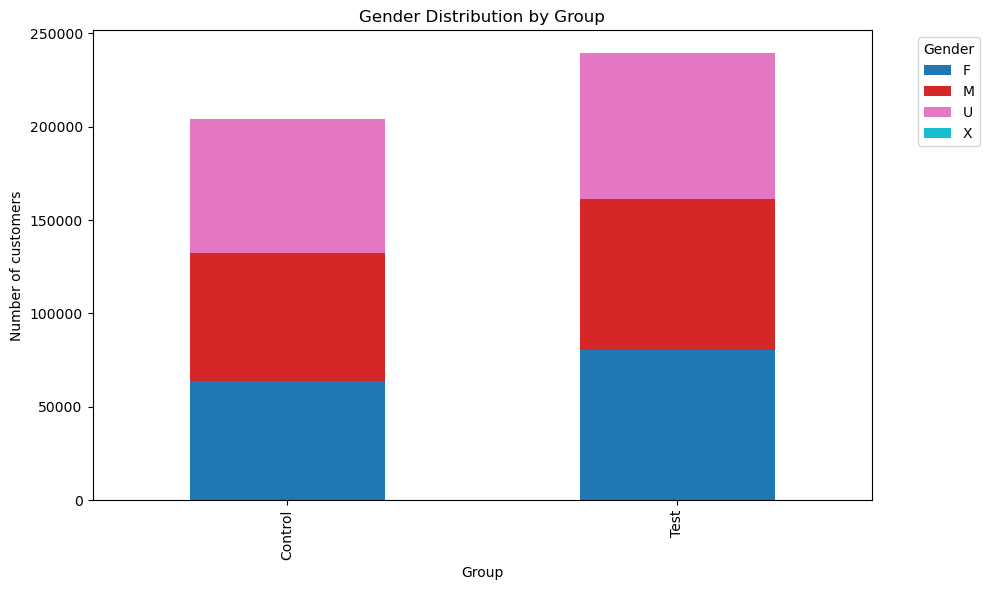

In [51]:
gender_distribution = df_final.groupby(['Variation', 'gender']).size().unstack()

plt.figure(figsize=(10, 6))

gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')  
plt.title("Gender Distribution by Group")
plt.ylabel("Number of customers")
plt.xlabel("Group")
plt.legend(title = "Gender", bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()  
plt.show()


Comparación entre grupos

- Comparación saldo:

In [26]:

control_balance = df_final[df_final['Variation'] == 'Control']['balance']
test_balance = df_final[df_final['Variation'] == 'Test']['balance']

# Prueba t de Student
t_stat_balance, p_value_balance = stats.ttest_ind(control_balance, test_balance, equal_var = False)

# Resultados
alpha = 0.05  # Nivel de significancia
if p_value_balance < alpha:
    print(f"We reject the null hypothesis (p-value: {p_value_balance}), there is a significant difference in the balances between Test and Control.")
else:
    print(f"We do not reject the null hypothesis (p-value: {p_value_balance}), there is no significant difference in the balances between Test and Control")

We reject the null hypothesis (p-value: 1.633568378196154e-07), there is a significant difference in the balances between Test and Control.


Gráfico saldo por grupo:

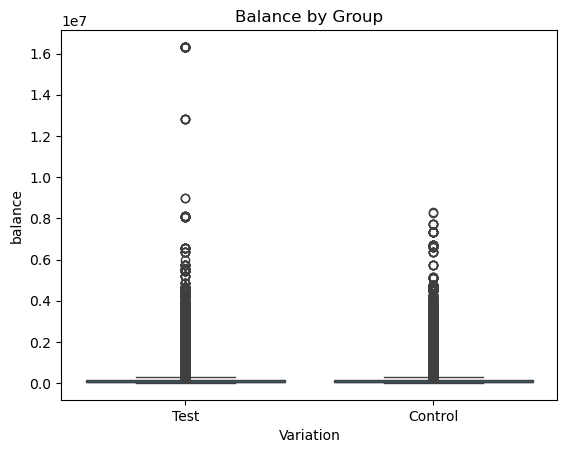

In [37]:
sns.boxplot(x = 'Variation', y = 'balance', data = df_final)
plt.title('Balance by Group')
plt.show()


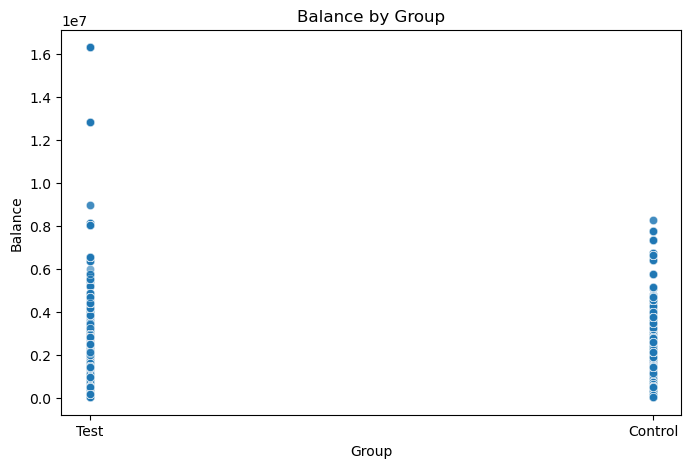

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Variation', y='balance', data=df_final, alpha=0.6)
plt.title('Balance by Group')
plt.ylabel('Balance')
plt.xlabel('Group')
plt.show()

- Comparar edades:

In [38]:
control_age = df_final[df_final['Variation'] == 'Control']['age']
test_age = df_final[df_final['Variation'] == 'Test']['age']

# Prueba t de Student
t_stat_age, p_value_age = stats.ttest_ind(control_age, test_age, equal_var=False)

if p_value_age < alpha:
    print(f"We reject the null hypothesis  (p-value: {p_value_age}), there is a significant difference in the balances between Test and Control.")
else:
    print(f"We do not reject the null hypothesis {p_value_age}), there is no significant difference in the balances between Test and Control")


We reject the null hypothesis  (p-value: 1.4314529235252942e-128), there is a significant difference in the balances between Test and Control.


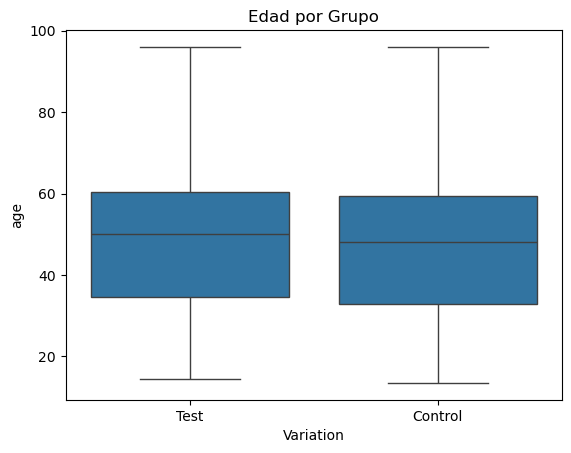

In [39]:
sns.boxplot(x = 'Variation', y = 'age', data = df_final)
plt.title('Edad por Grupo')
plt.show()

- Antigüedad por grupo, media y mediana:

In [70]:
# Datos de antigüedad para cada grupo
control_seniority = df_final[df_final['Variation'] == 'Control']['seniority_per_years']
test_seniority = df_final[df_final['Variation'] == 'Test']['seniority_per_years']

# Prueba t de Student para la antigüedad
t_stat_seniority, p_value_seniority = stats.ttest_ind(control_seniority, test_seniority, equal_var=False)

# Resultado de la hipótesis
if p_value_seniority < alpha:
    print(f"We reject the null hypothesis (p-value: {p_value_seniority}), there is a significant difference in seniority between Test and Control.")
else:
    print(f"We do not reject the null hypothesis (p-value: {p_value_seniority}), there is no significant difference in seniority between Test and Control.")


We reject the null hypothesis (p-value: 3.947148046511063e-06), there is a significant difference in seniority between Test and Control.


In [73]:
# Calcular la media de la antigüedad
mean_seniority_control = control_seniority.mean()
mean_seniority_test = test_seniority.mean()

# Calcular la mediana de la antigüedad
median_seniority_control = control_seniority.median()
median_seniority_test = test_seniority.median()

# Mostrar los resultados
print(f"Mean - Control: {mean_seniority_control:.2f}, Test: {mean_seniority_test:.2f}")
print(f"Median - Control: {median_seniority_control:.2f}, Test: {median_seniority_test:.2f}")


Mean - Control: 12.18, Test: 12.28
Median - Control: 11.00, Test: 11.00


Comparación del Número de Inicios de Sesión en 6 Meses entre Test y Control:

In [68]:
control_logons = df_final[df_final['Variation'] == 'Control']['logons_6_month']
test_logons = df_final[df_final['Variation'] == 'Test']['logons_6_month']

t_stat_logons, p_value_logons = stats.ttest_ind(control_logons, test_logons, equal_var=False)

if p_value_logons < alpha:
    print(f"We reject the null hypothesis (p-value: {p_value_logons}), there is a significant difference in the number of logons between Test and Control.")
else:
    print(f"We do not reject the null hypothesis (p-value: {p_value_logons}), there is no significant difference in the number of logons between Test and Control.")


We do not reject the null hypothesis (p-value: 0.9634262842146846), there is no significant difference in the number of logons between Test and Control.


- Comparación del Número de Llamadas entre Test y Control

Hipótesis:

H₀: No hay diferencia significativa en el número promedio de llamadas en los últimos 6 meses (calls_6_month) entre Test y Control.

H₁: Hay una diferencia significativa.

In [67]:
control_calls = df_final[df_final['Variation'] == 'Control']['calls_6_month']
test_calls = df_final[df_final['Variation'] == 'Test']['calls_6_month']

alpha = 0.05

t_stat_calls, p_value_calls = stats.ttest_ind(control_calls, test_calls, equal_var=False)

if p_value_calls < alpha:
    print(f"We reject the null hypothesis (p-value: {p_value_calls}), there is a significant difference in the number of calls between Test and Control.")
else:
    print(f"We do not reject the null hypothesis (p-value: {p_value_calls}), there is no significant difference in the number of calls between Test and Control.")


We reject the null hypothesis (p-value: 5.930102616140617e-113), there is a significant difference in the number of calls between Test and Control.


In [69]:
mean_calls_control = control_calls.mean()
mean_calls_test = test_calls.mean()

print(f"Average number of calls in Control group: {mean_calls_control}")
print(f"Average number of calls in Test group: {mean_calls_test}")

if mean_calls_test > mean_calls_control:
    print("The Test group had more calls on average.")
else:
    print("The Control group had more calls on average.")


Average number of calls in Control group: 3.6053801559011323
Average number of calls in Test group: 3.4529288004274648
The Control group had more calls on average.
